In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN

In [2]:
data_1 = TabularDataset('Anti-Sa-LH - AutoML_2.csv')
#data=data.drop(['Anti_Sa'], axis=1)
data_1.head()

,Hp,Ep,Length,Hydrophobic residue%,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Anti_Sa,Label
0,0.231,0.269,26,0.500,0.349390,0.417308,1.08,0.07,8.0,11.79,...,38.462,42.308,11.538,61.538,38.462,30.769,30.769,0.000,3.995408,1
1,0.250,0.292,24,0.125,0.210349,-0.147917,0.26,2.45,5.0,10.79,...,25.000,4.167,41.667,25.000,75.000,66.667,58.333,8.333,116.038004,2
2,0.318,0.545,22,0.455,0.281466,0.397727,0.92,0.17,3.0,10.43,...,40.909,31.818,4.545,54.545,45.455,31.818,22.727,9.091,98.780883,2
3,0.360,0.320,25,0.440,0.369713,0.278400,1.11,0.46,4.0,10.37,...,32.000,36.000,8.000,48.000,52.000,36.000,28.000,8.000,98.803891,2
4,0.133,0.400,45,0.400,0.187799,0.102000,0.58,0.71,12.0,12.05,...,42.222,28.889,6.667,51.111,48.889,35.556,31.111,4.444,4.533390,1


In [3]:
Feature=pd.DataFrame(data_1.drop(['Anti_Sa','Label'], axis=1))
Lab=data_1['Label']
Lab=pd.DataFrame(Lab)

BorderlineSMOTE

In [4]:
smo = BorderlineSMOTE(random_state=42)
x_smo, y_smo = smo.fit_resample(Feature,Lab)
x_smo=pd.DataFrame(x_smo)
smo=pd.merge(x_smo,y_smo,left_index=True, right_index=True)
smo

,Hp,Ep,Length,Hydrophobic residue%,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
0,0.231000,0.269000,26,0.500000,0.349390,0.417308,1.080000,0.070000,8.000000,11.790000,...,15.385000,38.462000,42.308000,11.538000,61.538000,38.462000,30.769000,30.769000,0.000000,1
1,0.250000,0.292000,24,0.125000,0.210349,-0.147917,0.260000,2.450000,5.000000,10.790000,...,20.833000,25.000000,4.167000,41.667000,25.000000,75.000000,66.667000,58.333000,8.333000,2
2,0.318000,0.545000,22,0.455000,0.281466,0.397727,0.920000,0.170000,3.000000,10.430000,...,22.727000,40.909000,31.818000,4.545000,54.545000,45.455000,31.818000,22.727000,9.091000,2
3,0.360000,0.320000,25,0.440000,0.369713,0.278400,1.110000,0.460000,4.000000,10.370000,...,16.000000,32.000000,36.000000,8.000000,48.000000,52.000000,36.000000,28.000000,8.000000,2
4,0.133000,0.400000,45,0.400000,0.187799,0.102000,0.580000,0.710000,12.000000,12.050000,...,33.333000,42.222000,28.889000,6.667000,51.111000,48.889000,35.556000,31.111000,4.444000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4600,0.354172,0.340473,20,0.479764,0.365759,0.182062,2.134475,-0.050657,-0.058279,0.322931,...,25.000000,28.511824,25.000000,25.000000,46.488176,53.511824,46.488176,42.976352,3.511824,3
4601,0.154601,0.348796,31,0.452000,0.453608,0.284000,0.497027,-0.303969,-0.434581,0.201646,...,41.935000,58.065000,35.161449,6.129449,60.967549,39.032451,22.903451,16.129000,6.774451,3
4602,0.505349,0.200000,10,0.214281,0.244496,-0.128074,4.353036,0.251397,0.063621,0.533546,...,19.286881,20.000000,10.534853,20.000000,40.000000,60.000000,50.178266,50.178266,0.000000,3
4603,0.551426,0.446501,11,0.359274,0.384743,0.072147,0.719436,2.124610,4.248751,12.400879,...,0.207293,26.971472,9.543271,17.428201,36.307451,63.692549,37.343913,37.136621,0.207293,3


In [5]:
data=smo

AutoGluon

In [6]:
train_data,test_data=train_test_split(data, test_size=0.2,random_state=0)
train_data.head()

,Hp,Ep,Length,Hydrophobic residue%,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
23,0.333,0.167,12,0.667,0.072437,0.775833,0.710000,-0.300000,4.000000,11.420000,...,0.000,8.333,33.333,33.333,66.667,33.333,33.333,33.333,0.000,1
3174,0.263,0.158,19,0.579,0.363259,0.618947,0.986316,-0.302105,-0.090526,0.158947,...,15.789,47.368,47.368,10.526,68.421,31.579,21.053,21.053,0.000,2
569,0.231,0.385,13,0.385,0.684438,0.023077,1.925385,0.055385,-0.104615,0.333846,...,7.692,7.692,30.769,0.000,38.462,61.538,53.846,46.154,7.692,3
2876,0.250,0.281,32,0.375,0.281914,0.236875,3.732813,-0.040313,-0.001250,0.353750,...,28.125,31.250,21.875,12.500,50.000,50.000,34.375,34.375,0.000,3
415,0.308,0.500,26,0.500,0.234614,0.518462,0.995769,-0.133077,-0.246538,0.136538,...,34.615,42.308,30.769,3.846,53.846,46.154,19.231,15.385,3.846,1


In [7]:
label='Label'
print("Summary of antisa activity coulum: \n", train_data['Label'].describe())
print("Summary of antisa activity coulum: \n", test_data['Label'].describe())

Summary of antisa activity coulum: 
 count    3684.000000
mean        2.010043
std         0.815714
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Label, dtype: float64
Summary of antisa activity coulum: 
 count    921.000000
mean       1.959826
std        0.819274
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Label, dtype: float64


In [23]:
save_path = 'antisa_new'
predictor = TabularPredictor(label=label, path=save_path).fit(train_data, num_bag_folds=10, num_bag_sets=1, num_stack_levels=1, presets='best_quality')
results = predictor.fit_summary()

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=10, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "antisa_new\"
AutoGluon Version:  0.5.2
Python Version:     3.7.6
Operating System:   Windows
Train Data Rows:    3684
Train Data Columns: 94
Label Column: Label
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [1, 2, 3]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2387.66 MB
	Train Data (Original)  Memory Usage: 2.77 MB (0.1% of available memory)
	Inferr

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3   0.729913      12.669008  1679.582764                0.000000           0.671168            3       True         26
1         LightGBMXT_BAG_L2   0.729913      12.669008  1678.911596                0.313195          56.805157            2       True         16
2            XGBoost_BAG_L2   0.728284      12.607405  1849.665520                0.251592         227.559081            2       True         23
3           LightGBM_BAG_L2   0.726113      12.543313  1709.166425                0.187500          87.059986            2       True         17
4      LightGBMLarge_BAG_L2   0.724756      13.355882  1931.195393                1.000069         309.088954            2       True         25
5           CatBoost_BAG_L2   0.722313      12.480764  1893.327995  

In [24]:
y_test = test_data[label]
test_data_nolab= test_data.drop(columns=[label])
test_data_nolab.head()

,Hp,Ep,Length,Hydrophobic residue%,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,MSWHIM3,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.
3728,0.062,0.188,16,0.688,0.579195,0.715625,-0.993750,-0.521250,-0.068125,0.138750,...,-0.136875,18.750,25.000,43.750,18.750,75.000,25.000,25.000,25.000,0.000
3043,0.062,0.354,48,0.521,0.172371,0.030000,1.577500,-0.152500,-0.020000,0.432500,...,0.060000,25.000,25.000,25.000,25.000,50.000,50.000,50.000,50.000,0.000
2618,0.520,0.200,25,0.400,0.239577,0.156000,2.210000,0.017200,-0.044000,0.381200,...,-0.015200,20.000,28.000,28.000,12.000,48.000,52.000,40.000,40.000,0.000
2507,0.037,0.556,27,0.444,0.279727,0.135556,2.473704,-0.163704,-0.215185,0.385185,...,-0.175185,33.333,44.444,37.037,11.111,51.852,48.148,37.037,37.037,0.000
170,0.250,0.625,24,0.542,0.446403,0.540833,1.000000,-0.330000,3.000000,10.680000,...,-0.370833,37.500,45.833,33.333,16.667,62.500,37.500,20.833,16.667,4.167


In [25]:
predictor=TabularPredictor.load(save_path)

y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
print("GT: \n", y_test)
performance = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.7307274701411509
Evaluations on test data:
{
    "accuracy": 0.7307274701411509,
    "balanced_accuracy": 0.7327319263839187,
    "mcc": 0.5972373819750058
}


Predictions: 
 3728    1
3043    3
2618    1
2507    3
170     3
       ..
2027    1
1351    1
576     3
836     1
124     1
Name: Label, Length: 921, dtype: int64
GT: 
 3728    2
3043    3
2618    1
2507    1
170     3
       ..
2027    1
1351    3
576     3
836     1
124     1
Name: Label, Length: 921, dtype: int64


In [26]:
predictor.leaderboard(test_data,extra_metrics=['accuracy',
                                               'f1_macro','f1_micro',
                                               'roc_auc_ovo_macro',
                                               'precision_macro','precision_micro',
                                               'recall_macro','recall_micro'], silent=True)

,model,score_test,accuracy,f1_macro,f1_micro,roc_auc_ovo_macro,precision_macro,precision_micro,recall_macro,recall_micro,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch_BAG_L2,0.732899,0.732899,0.732838,0.732899,0.867940,0.732879,0.732899,0.734631,0.732899,0.720413,7.718328,13.218097,1670.990471,0.435830,0.862285,48.884032,2,True,24
1,LightGBM_BAG_L2,0.730727,0.730727,0.730679,0.730727,0.869174,0.731314,0.730727,0.733291,0.730727,0.726113,7.626408,12.543313,1709.166425,0.343910,0.187500,87.059986,2,True,17
2,WeightedEnsemble_L3,0.730727,0.730727,0.730757,0.730727,0.870137,0.731072,0.730727,0.732732,0.730727,0.729913,7.719895,12.669008,1679.582764,0.000000,0.000000,0.671168,3,True,26
3,LightGBMXT_BAG_L2,0.730727,0.730727,0.730757,0.730727,0.870137,0.731072,0.730727,0.732732,0.730727,0.729913,7.719895,12.669008,1678.911596,0.437397,0.313195,56.805157,2,True,16
4,LightGBMLarge_BAG_L2,0.729642,0.729642,0.729671,0.729642,0.869340,0.730441,0.729642,0.731978,0.729642,0.724756,8.272247,13.355882,1931.195393,0.989749,1.000069,309.088954,2,True,25
5,ExtraTreesEntr_BAG_L2,0.728556,0.728556,0.728452,0.728556,0.864777,0.729623,0.728556,0.730391,0.728556,0.709826,7.476904,12.699483,1623.483183,0.194406,0.343670,1.376744,2,True,22
6,XGBoost_BAG_L2,0.728556,0.728556,0.728552,0.728556,0.870913,0.729168,0.728556,0.730870,0.728556,0.728284,7.769170,12.607405,1849.665520,0.486672,0.251592,227.559081,2,True,23
7,RandomForestGini_BAG_L2,0.724213,0.724213,0.724043,0.724213,0.865608,0.724557,0.724213,0.726064,0.724213,0.708740,7.454187,12.659581,1625.245223,0.171689,0.303769,3.138784,2,True,18
8,CatBoost_BAG_L2,0.723127,0.723127,0.722885,0.723127,0.866928,0.723867,0.723127,0.725006,0.723127,0.722313,7.423126,12.480764,1893.327995,0.140628,0.124952,271.221556,2,True,20
9,RandomForestEntr_BAG_L2,0.722041,0.722041,0.721859,0.722041,0.866574,0.723085,0.722041,0.724031,0.722041,0.710641,7.457670,12.649490,1626.962482,0.175172,0.293677,4.856043,2,True,19


In [27]:
model_best=predictor.get_model_best()
model_best

'WeightedEnsemble_L3'

In [28]:
specific_model = predictor._trainer.load_model(model_best)
model_info = specific_model.get_info()
model_info

{'name': 'WeightedEnsemble_L3',
 'model_type': 'WeightedEnsembleModel',
 'problem_type': 'multiclass',
 'eval_metric': 'accuracy',
 'stopping_metric': 'accuracy',
 'fit_time': 0.6711680889129639,
 'num_classes': 3,
 'quantile_levels': None,
 'predict_time': 0.0,
 'val_score': 0.7299131378935939,
 'hyperparameters': {'use_orig_features': False,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': ['save_bag_folds'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None,
  'drop_unique': False},
 'num_features': 3,
 'features': ['LightGBMXT_BAG_L2_1',
  'LightGBMXT_BAG_L2_0',
  'LightGBMXT_BAG_L2_2'],

In [29]:
model_pred=predictor.predict(test_data_nolab,model=model_best)

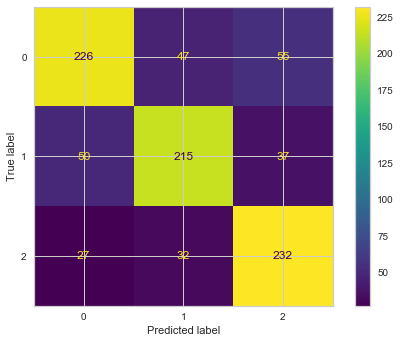

In [30]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam
from yellowbrick.datasets import load_credit
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#AUC_fig=ROCAUC(model_best,test_data_nolab, test_data[label],classes=["No acvtivity","Activity"])
#RocCurveDisplay.from_predictions(y_test, model_pred)
cm=confusion_matrix(y_test,model_pred)
cm_display=ConfusionMatrixDisplay(cm).plot()

In [31]:
y_probas=predictor.predict_proba(test_data_nolab)

F:\anaconda\install\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


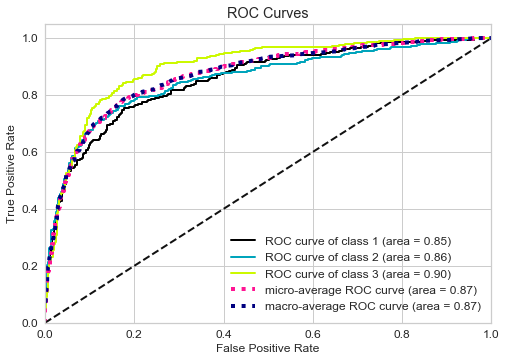

In [32]:
#AUC-figure1
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test,y_probas)

plt.savefig("ROC-cur.pdf")
plt.show()

In [33]:
pd.set_option('max_row',100)
importance=pd.DataFrame(predictor.feature_importance(test_data))
importance

Computing feature importance via permutation shuffling for 94 features using 921 rows with 5 shuffle sets...
	3117.85s	= Expected runtime (623.57s per shuffle set)
	1102.16s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Length,0.056678,0.006256,0.000018,5,0.069559,0.043796
Small_Mole.,0.028230,0.006284,0.000276,5,0.041170,0.015291
Tiny_Mole.,0.019978,0.005461,0.000608,5,0.031223,0.008733
Aliphatic_Mole.,0.019761,0.004819,0.000393,5,0.029684,0.009838
Basic_Mole.,0.019327,0.008598,0.003676,5,0.037029,0.001624
Charged_Mole.,0.016069,0.002592,0.000079,5,0.021407,0.010732
Aromatic_Mole.,0.014767,0.002934,0.000177,5,0.020807,0.008726
Tilt Angle,0.014549,0.004106,0.000687,5,0.023004,0.006095
Polar_Mole.,0.010641,0.005715,0.007052,5,0.022407,-0.001126
Acidic_Mole.,0.009338,0.005977,0.012521,5,0.021644,-0.002968
